<a href="https://colab.research.google.com/github/AntonioWh1te/The-Journey/blob/main/Phase_2_2_FMP_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1:  Cumulative Returns of Single Asset
Goal: Fetch historical price data for single asset and plot it.


*   NVDA (NVIDIA)

Enter your API Key Here: ··········


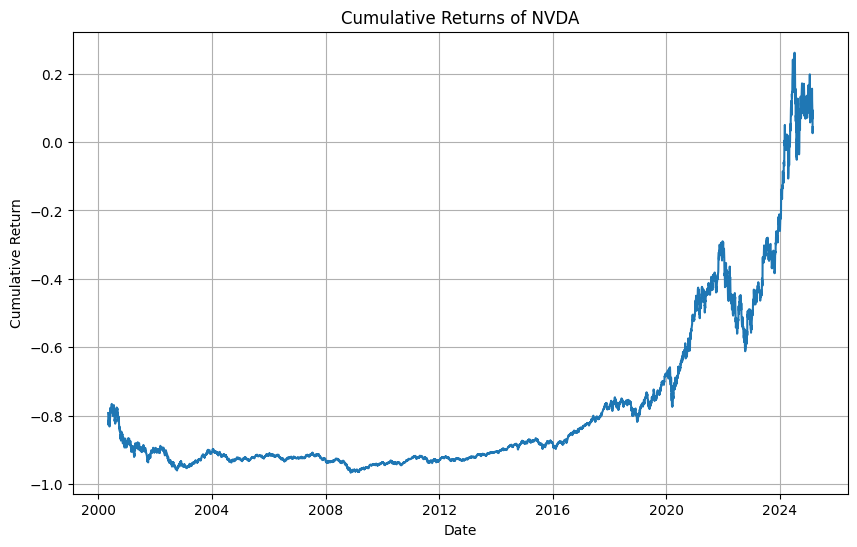

In [5]:
import pandas as pd
import getpass
import requests
import matplotlib.pyplot as plt
import seaborn as sns

apikey = getpass.getpass("Enter your API Key Here: ")
ticker = "SMH"

# Constructing the URL
url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{ticker}?apikey={apikey}&serietype=line"

# Make the API request and parse the JSON
response = requests.get(url)
data_json = response.json()

historical_data = data_json.get("historical", [])
df = pd.DataFrame(historical_data)

# Convert the 'date' column to datetime and set it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Calculate Daily Returns from 'close' column
df['Daily_Return'] = df['close'].pct_change()

# Assuming df is your DataFrame with 'Daily_Return' column
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1
# Calculate cumulative returns

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Cumulative_Return'])
plt.title('Cumulative Returns of NVDA')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

# Exercise 2: Comparing Cumulative Returns of Multiple Assets
Goal: Fetch historical price data for multiple stocsk/ETF's, calculate their cumulative returns, and plot them on the same chart for comparison.
Assets:


*   SPY (S&P 500 ETF)
*   QQQ (Nasdaq 100 ETF)
*   AAPL (Apple)
*   MSFT (Microsoft)



In [6]:
import pandas as pd
import requests
import getpass
import matplotlib as plt

apikey = getpass.getpass("Enter your API Key Here: ")

# Define a function that takes a ticker symbol as input and returns a Pandas DataFrame with the historical prices and calculated cumulative returns.
def get_cumulative_returns(ticker):
  url = f"https://financialmodelingprep.com/api/v3/historical-price-full{ticker}?apikey={apikey}&serietype=line"
  response = requests.get(url)
  data = response.json()
  df = pd.DataFrame(data['historical'])
  df['date'] = pd.to_datetime(df['date'])
  df.set_index('date', inplace=True)
  df['Daily_Return'] = df['close'].pct_change()
  df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1
  return df

# Use a loop call to get_cumulative_returns function for each ticker and store the results in a dictionary.
tickers = ['SPY', 'QQQ', 'AAPL', 'MSFT']
returns_data = {}
for ticker in tickers:
  returns_data[ticker] = get_cumulative_returns(ticker)

plt.figure(figsize=(12, 6))
for ticker, data in returns_data.items():
  plt.plot(data.index, data['Cumulative_Return'], label=ticker)

  plt.title('Cumulative Returns Comparison')
  plt.xlabel('Date')
  plt.ylabel('Cumulative Return')
  plt.legend()
  plt.grid(True)
  plt.show()













Enter your API Key Here: ··········


TypeError: list indices must be integers or slices, not str

Enter your API Key Here: ··········


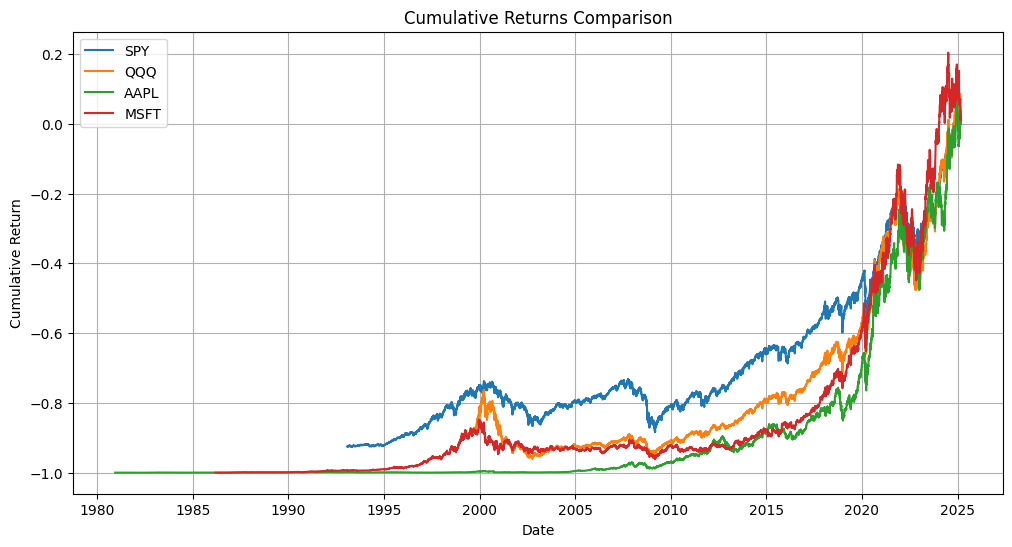

In [8]:
import pandas as pd
import requests
import getpass
import matplotlib.pyplot as plt

apikey = getpass.getpass("Enter your API Key Here: ")

# Define a function that takes a ticker symbol as input and returns a Pandas DataFrame with the historical prices and calculated cumulative returns.
def get_cumulative_returns(ticker):
  # Added '/' to the URL to form the correct endpoint path
  url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{ticker}?apikey={apikey}&serietype=line"
  response = requests.get(url)
  data = response.json()
  # Accessing the 'historical' data correctly. If 'data' is a list, take the first element. If it's a dictionary, use 'historical' key directly
  historical_data = data['historical'] if isinstance(data, dict) and 'historical' in data else data[0]['historical'] if isinstance(data, list) and data and isinstance(data[0], dict) and 'historical' in data[0] else []
  df = pd.DataFrame(historical_data)
  df['date'] = pd.to_datetime(df['date'])
  df.set_index('date', inplace=True)
  df['Daily_Return'] = df['close'].pct_change()
  df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1
  return df

# Use a loop call to get_cumulative_returns function for each ticker and store the results in a dictionary.
tickers = ['SPY', 'QQQ', 'AAPL', 'MSFT']
returns_data = {}
for ticker in tickers:
  returns_data[ticker] = get_cumulative_returns(ticker)

# Create a single figure and axes for the plot
plt.figure(figsize=(12, 6))

# Plot cumulative returns for each ticker on the same axes
for ticker, data in returns_data.items():
  plt.plot(data.index, data['Cumulative_Return'], label=ticker)

# Add title, labels, legend, and grid
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Enter your API Key Here: ··········


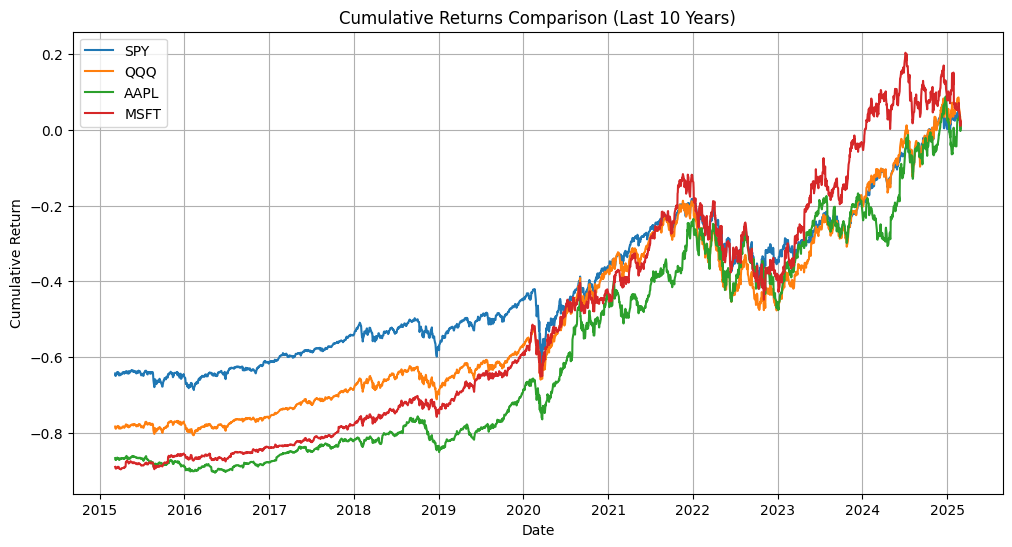

In [9]:
import pandas as pd
import requests
import getpass
import matplotlib.pyplot as plt
import datetime

apikey = getpass.getpass("Enter your API Key Here: ")

# Define a function that takes a ticker symbol as input and returns a Pandas DataFrame with the historical prices and calculated cumulative returns.
def get_cumulative_returns(ticker):
  # Added '/' to the URL to form the correct endpoint path
  url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{ticker}?apikey={apikey}&serietype=line"
  response = requests.get(url)
  data = response.json()
  # Accessing the 'historical' data correctly. If 'data' is a list, take the first element. If it's a dictionary, use 'historical' key directly
  historical_data = data['historical'] if isinstance(data, dict) and 'historical' in data else data[0]['historical'] if isinstance(data, list) and data and isinstance(data[0], dict) and 'historical' in data[0] else []
  df = pd.DataFrame(historical_data)
  df['date'] = pd.to_datetime(df['date'])
  df.set_index('date', inplace=True)

  # Filter data for the last 10 years
  ten_years_ago = datetime.date.today() - datetime.timedelta(days=10*365)
  df = df[df.index.date >= ten_years_ago]

  df['Daily_Return'] = df['close'].pct_change()
  df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1
  return df

# Use a loop call to get_cumulative_returns function for each ticker and store the results in a dictionary.
tickers = ['SPY', 'QQQ', 'AAPL', 'MSFT']
returns_data = {}
for ticker in tickers:
  returns_data[ticker] = get_cumulative_returns(ticker)

# Create a single figure and axes for the plot
plt.figure(figsize=(12, 6))

# Plot cumulative returns for each ticker on the same axes
for ticker, data in returns_data.items():
  plt.plot(data.index, data['Cumulative_Return'], label=ticker)

# Add title, labels, legend, and grid
plt.title('Cumulative Returns Comparison (Last 10 Years)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Enter your API Key Here: ··········


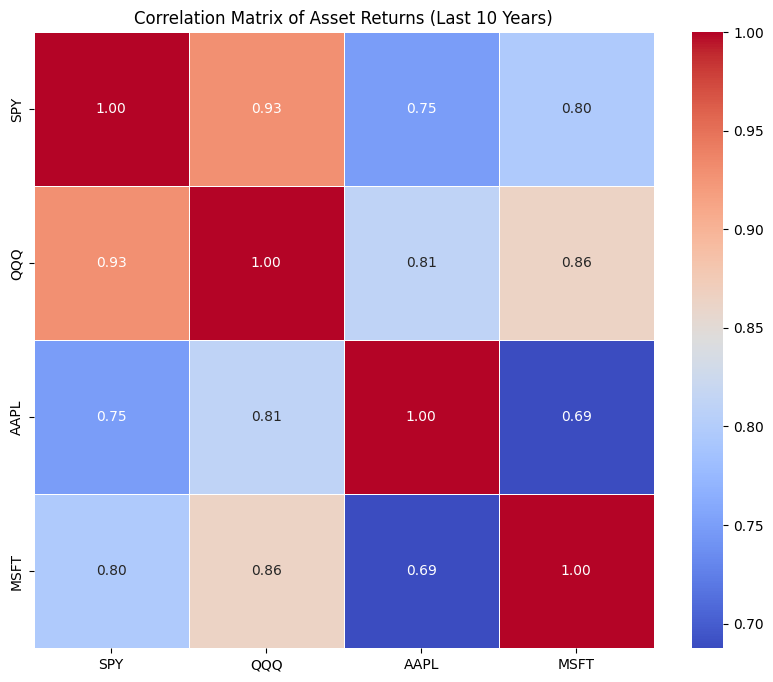

In [15]:
!pip install plotly seaborn
import pandas as pd
import requests
import getpass
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

apikey = getpass.getpass("Enter your API Key Here: ")

# Define a function that takes a ticker symbol as input and returns a Pandas DataFrame with the historical prices and calculated cumulative returns.
def get_cumulative_returns(ticker):
    # Added '/' to the URL to form the correct endpoint path
    url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{ticker}?apikey={apikey}&serietype=line"
    response = requests.get(url)
    data = response.json()
    # Accessing the 'historical' data correctly. If 'data' is a list, take the first element. If it's a dictionary, use 'historical' key directly
    historical_data = data['historical'] if isinstance(data, dict) and 'historical' in data else data[0]['historical'] if isinstance(data, list) and data and isinstance(data[0], dict) and 'historical' in data[0] else []
    df = pd.DataFrame(historical_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    # Filter data for the last 10 years
    ten_years_ago = datetime.date.today() - datetime.timedelta(days=10*365)
    df = df[df.index.date >= ten_years_ago]

    df['Daily_Return'] = df['close'].pct_change()
    df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1
    return df

# Use a loop call to get_cumulative_returns function for each ticker and store the results in a dictionary.
tickers = ['SPY', 'QQQ', 'AAPL', 'MSFT']
returns_data = {}
for ticker in tickers:
    returns_data[ticker] = get_cumulative_returns(ticker)

# Create a DataFrame with daily returns of all assets
daily_returns_df = pd.DataFrame({ticker: data['Daily_Return'] for ticker, data in returns_data.items()})

# Calculate the correlation matrix
correlation_matrix = daily_returns_df.corr()

# Create a heatmap with annotations
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Asset Returns (Last 10 Years)')
plt.show()